In [1]:
import numpy as np
import pandas as pd
data =pd.read_csv('/content/cyber security dataset.csv')

In [2]:
data.shape

(8994, 44)

# Data Analysis:

In [ ]:
import matplotlib.pyplot as plt
 
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "blue",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [ ]:
data['srv_rate'].head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,0,0,tcp,http,SF,295,2584,0,0,0,...,1.00,0.00,0.01,0.03,0.0,0.0,0.00,0.01,21,0
1,1,0,tcp,http,SF,312,839,0,0,0,...,1.00,0.00,0.00,0.02,0.0,0.0,0.01,0.01,21,0
2,2,0,tcp,ftp,SF,1225,2451,0,0,0,...,0.45,0.02,0.00,0.00,0.0,0.0,0.00,0.00,11,1
3,3,0,tcp,http,SF,293,296,0,0,0,...,1.00,0.00,0.00,0.02,0.0,0.0,0.00,0.02,21,0
4,4,0,tcp,X11,REJ,0,0,0,0,0,...,0.01,0.03,0.01,0.00,0.0,0.0,0.01,1.00,11,0


bianry classificaiton problem

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23002 entries, 0 to 23001
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           23002 non-null  int64  
 1   duration                     23002 non-null  int64  
 2   protocol_type                23002 non-null  object 
 3   service                      23002 non-null  object 
 4   flag                         23002 non-null  object 
 5   src_bytes                    23002 non-null  int64  
 6   dst_bytes                    23002 non-null  int64  
 7   land                         23002 non-null  int64  
 8   wrong_fragment               23002 non-null  int64  
 9   urgent                       23002 non-null  int64  
 10  hot                          23002 non-null  int64  
 11  num_failed_logins            23002 non-null  int64  
 12  logged_in                    23002 non-null  int64  
 13  num_compromised 

In [ ]:
data.isna().sum()


ID                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [ ]:
data.dropna(inplace=True)

## Features selection:

### Pearson's feature selection:

In [7]:
# get name of columns in object columns
object_column =list(data.select_dtypes(['object']))

In [ ]:
for col in object_column:
  print('n. of unique in ', col , ':', data[col].nunique())

n. of unique in  protocol_type : 3
n. of unique in  service : 66
n. of unique in  flag : 11


In [ ]:
#see number of unique values in every catogrical column

for col in data.columns:
  print(col , ':', data[col].nunique())


ID : 23002
duration : 702
protocol_type : 3
service : 66
flag : 11
src_bytes : 1578
dst_bytes : 3657
land : 2
wrong_fragment : 3
urgent : 2
hot : 20
num_failed_logins : 5
logged_in : 2
num_compromised : 26
root_shell : 2
su_attempted : 3
num_root : 25
num_file_creations : 20
num_shells : 2
num_access_files : 7
num_outbound_cmds : 1
is_host_login : 1
is_guest_login : 2
count : 461
srv_count : 408
serror_rate : 70
srv_serror_rate : 52
rerror_rate : 71
srv_rerror_rate : 40
same_srv_rate : 97
diff_srv_rate : 78
srv_diff_host_rate : 57
dst_host_count : 256
dst_host_srv_count : 256
dst_host_same_srv_rate : 101
dst_host_diff_srv_rate : 101
dst_host_same_src_port_rate : 101
dst_host_srv_diff_host_rate : 63
dst_host_serror_rate : 100
dst_host_srv_serror_rate : 87
dst_host_rerror_rate : 101
dst_host_srv_rerror_rate : 100
level : 22
Class : 2


In [ ]:
type(data['Class'])

pandas.core.series.Series

In [ ]:
import seaborn as sns

In [ ]:
unique_11_columns =[]
for col in  data:
  if((data[col].nunique()<=11) & (col !='Class')):
    unique_11_columns.append(col)
    
 

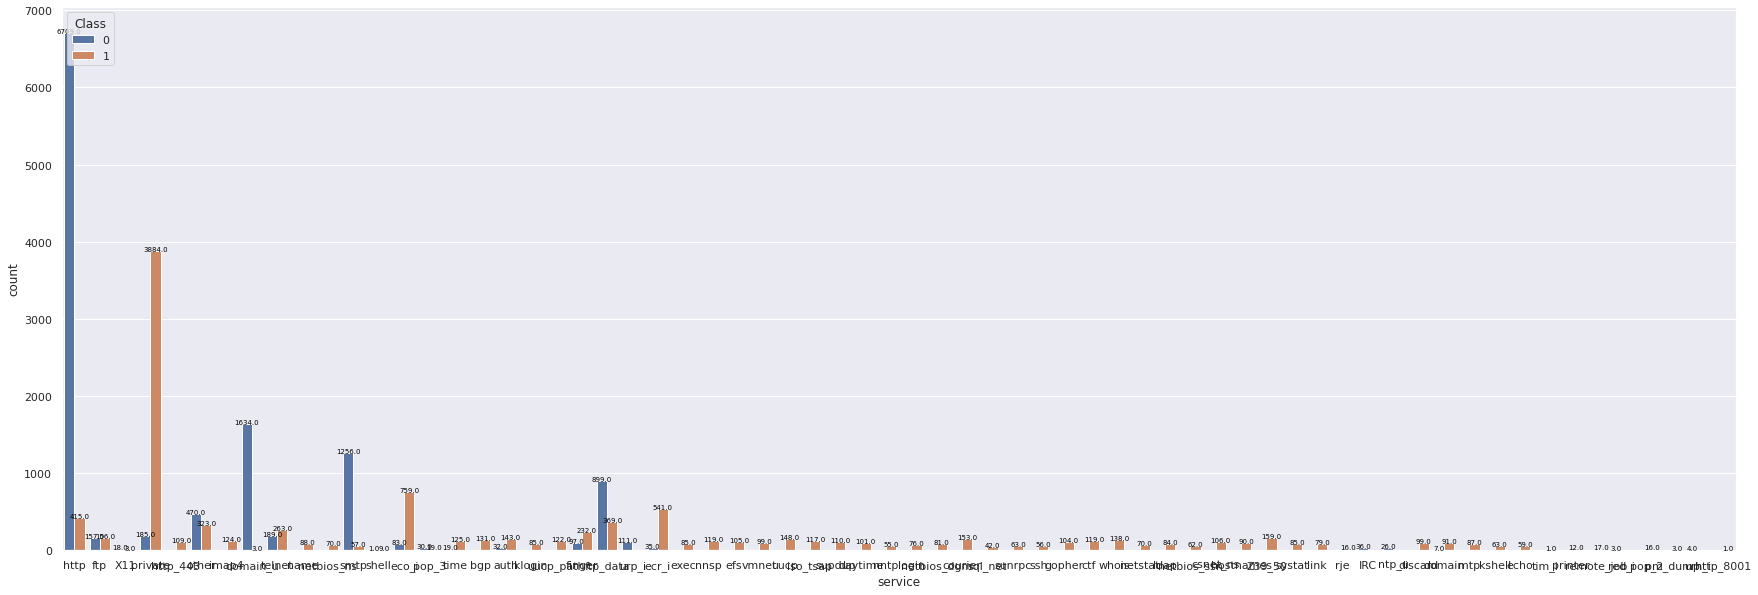

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
a=sns.countplot(data=data, x='service', hue='Class')

for p in a.patches:
  a.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()),ha='center',color='black', size=7)

the most improtant features that contain only one class, then that have a one class that have a high percentage of all the records in the catogery

service is very important

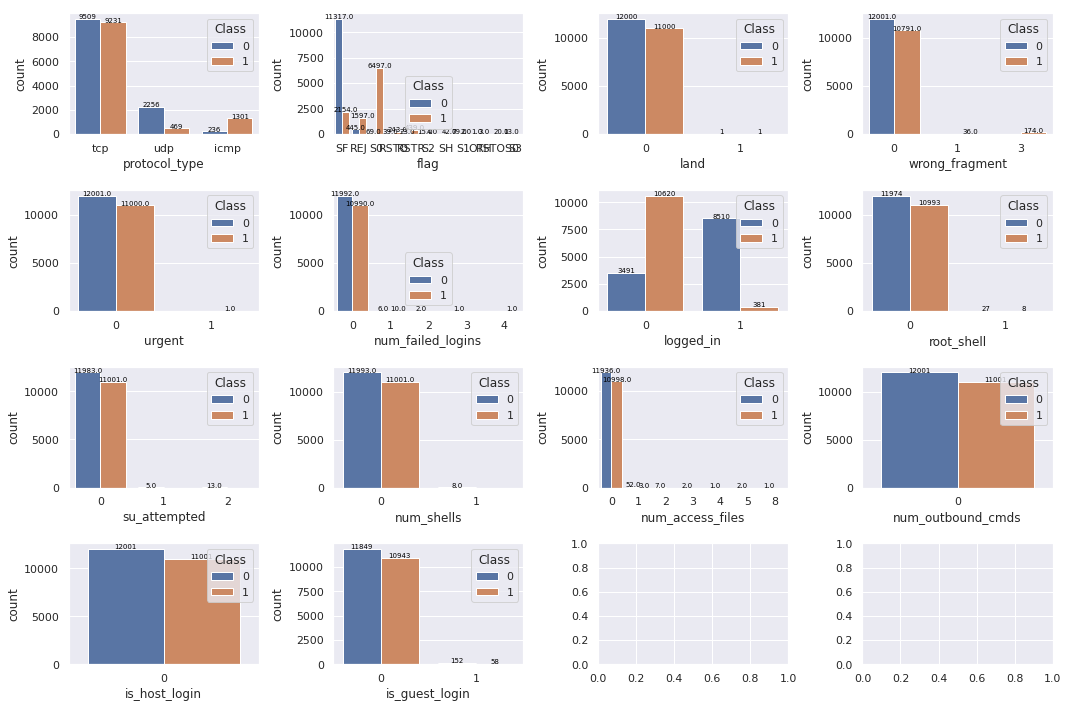

In [ ]:
import seaborn as sns

unbalanced_feature_Class_1 =data[data['Class']==1]
unbalanced_feature_Class_0 =data[data['Class']==0]
 
fig, ax =plt.subplots(ncols=4, nrows=4, figsize=(15,10))

ax=ax.flatten()

x=[]
 
#labels=[]
i=0

for col in unique_11_columns:
   a= sns.countplot(data=data, x=col, hue='Class',ax=ax[i])
   for p in a.patches:
    a.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()),ha='center',color='black', size=7)
   i=i+1

 

plt.tight_layout()  

 

to remove:
  
> protocol_type , land, root_shell,num_outbound_cmds, is_host_login, is_guest_login


important: 
 
> flag, wrong_fragment, num_failed login, logged_in, su_attempted, num_shells, num_accsess_files



not sure:  


> urgent



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

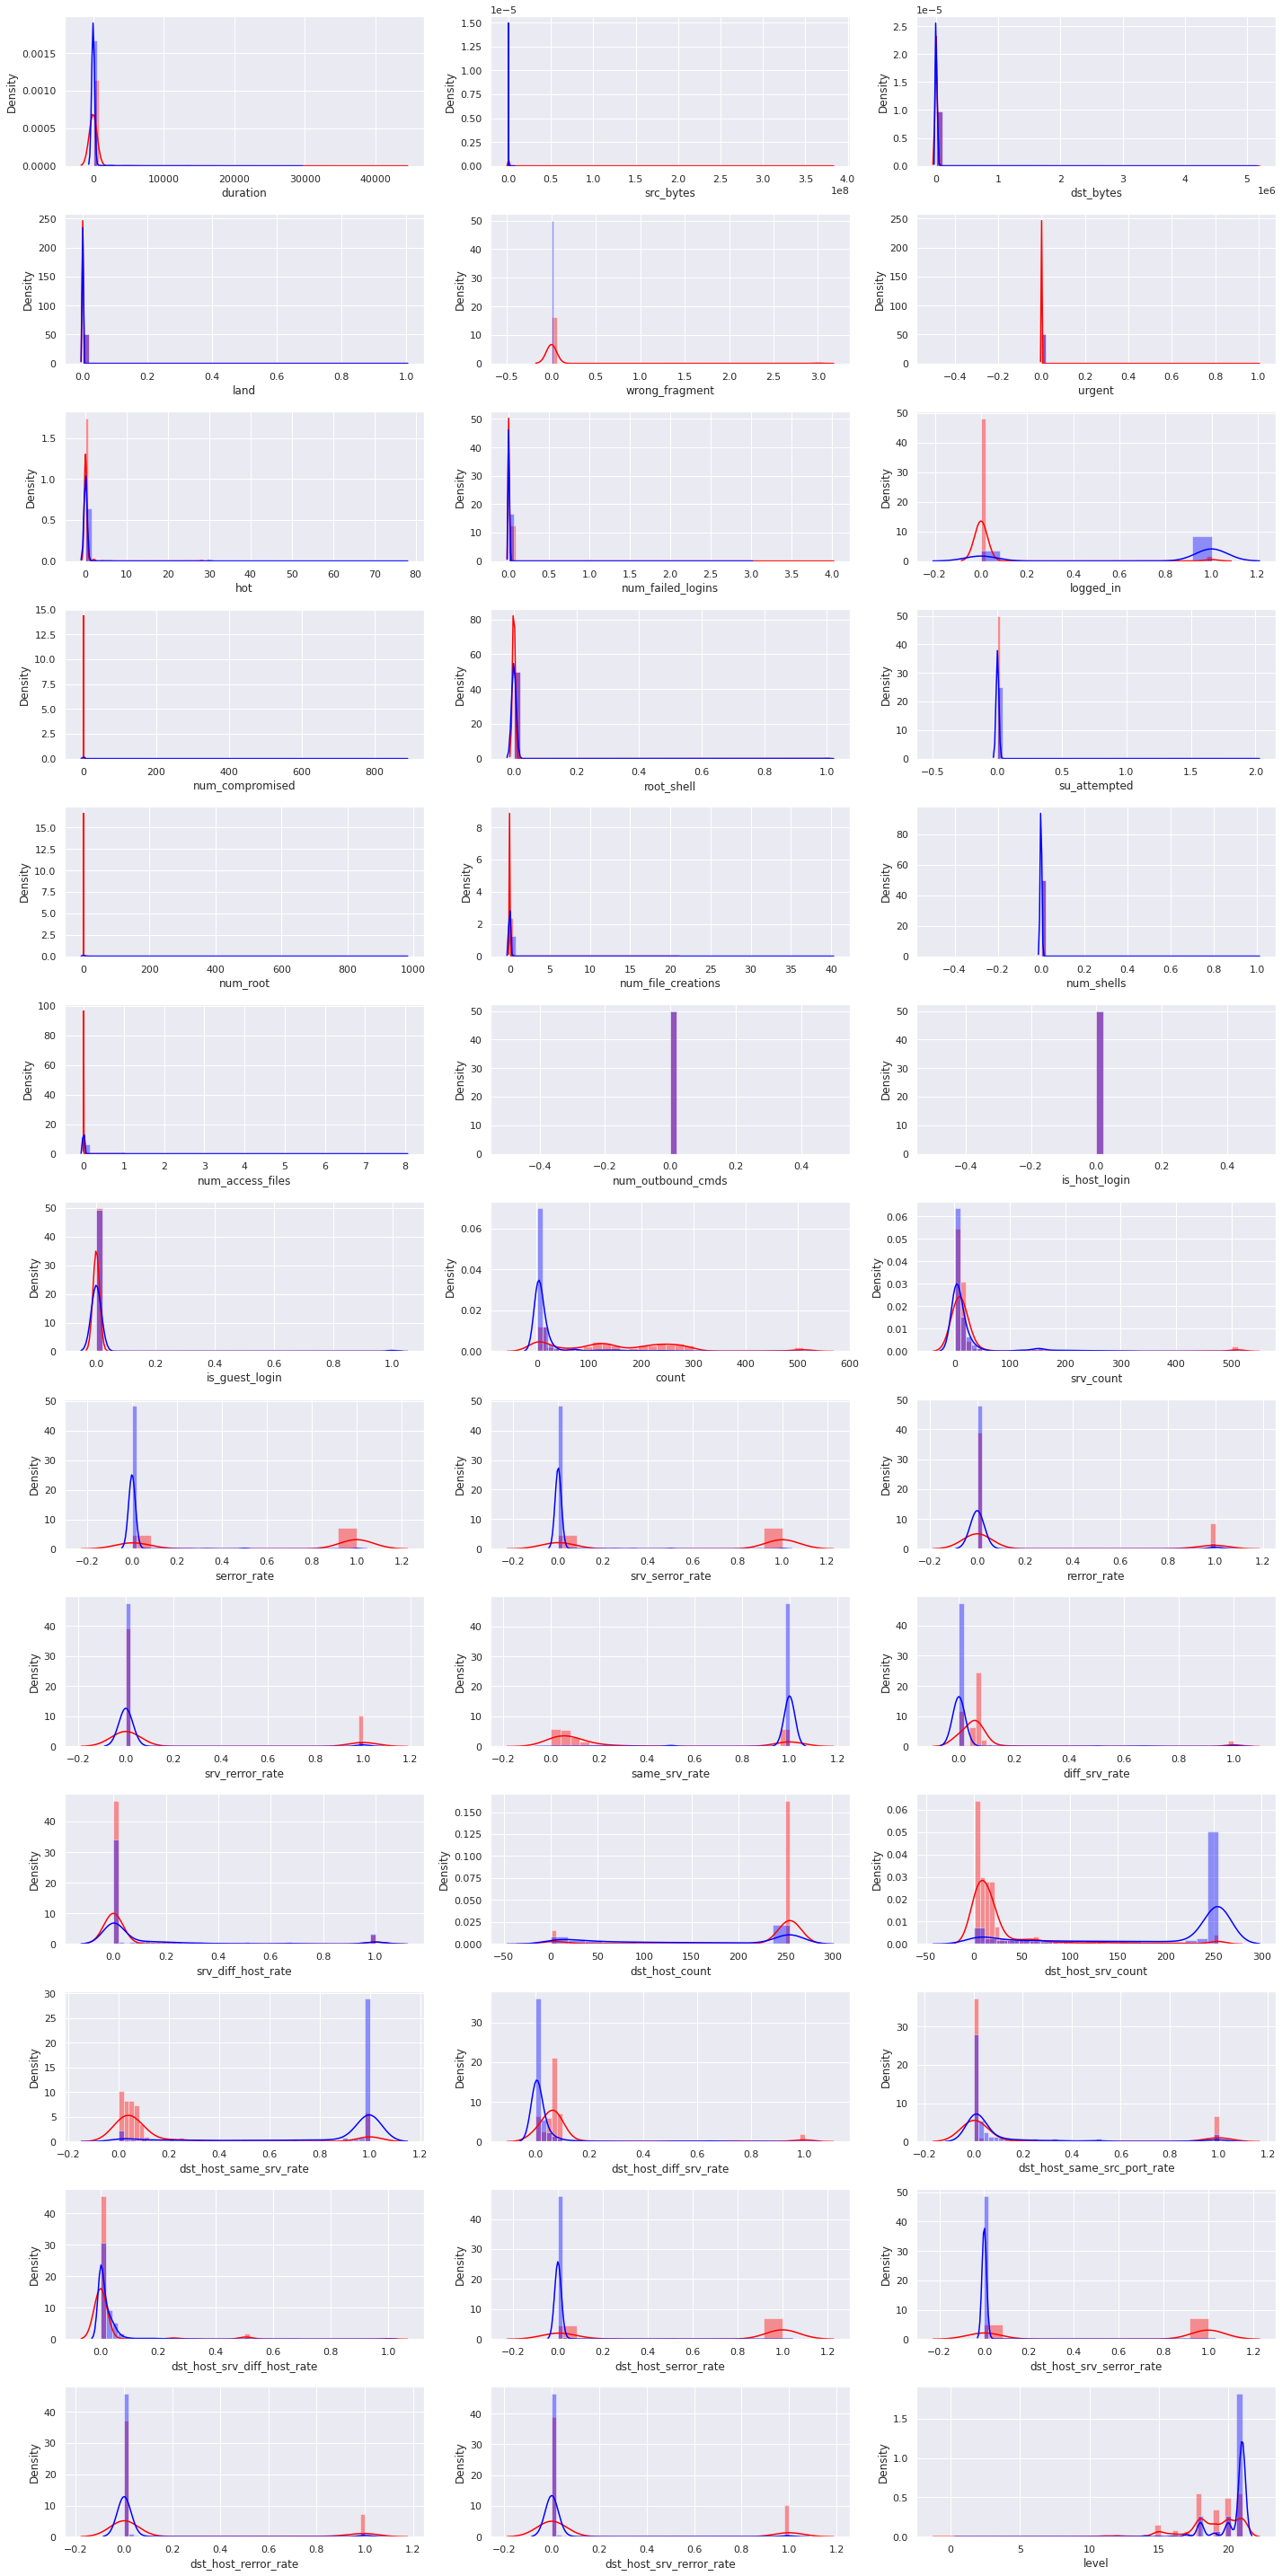

In [ ]:
 
data_parameter = data.drop(['Class','ID'],axis=1).columns
data_numerical = [x for x in data_parameter if (x not in object_column)]

fig, ax=plt.subplots(ncols=3, nrows=13,figsize=(20,40))

ax=ax.flatten()

for i, col in enumerate(data_numerical):
  sns.distplot(data[col].loc[data['Class']==1],ax=ax[i],color='red')
  sns.distplot(data[col].loc[data['Class']==0],ax=ax[i],color='blue')
  

plt.tight_layout()


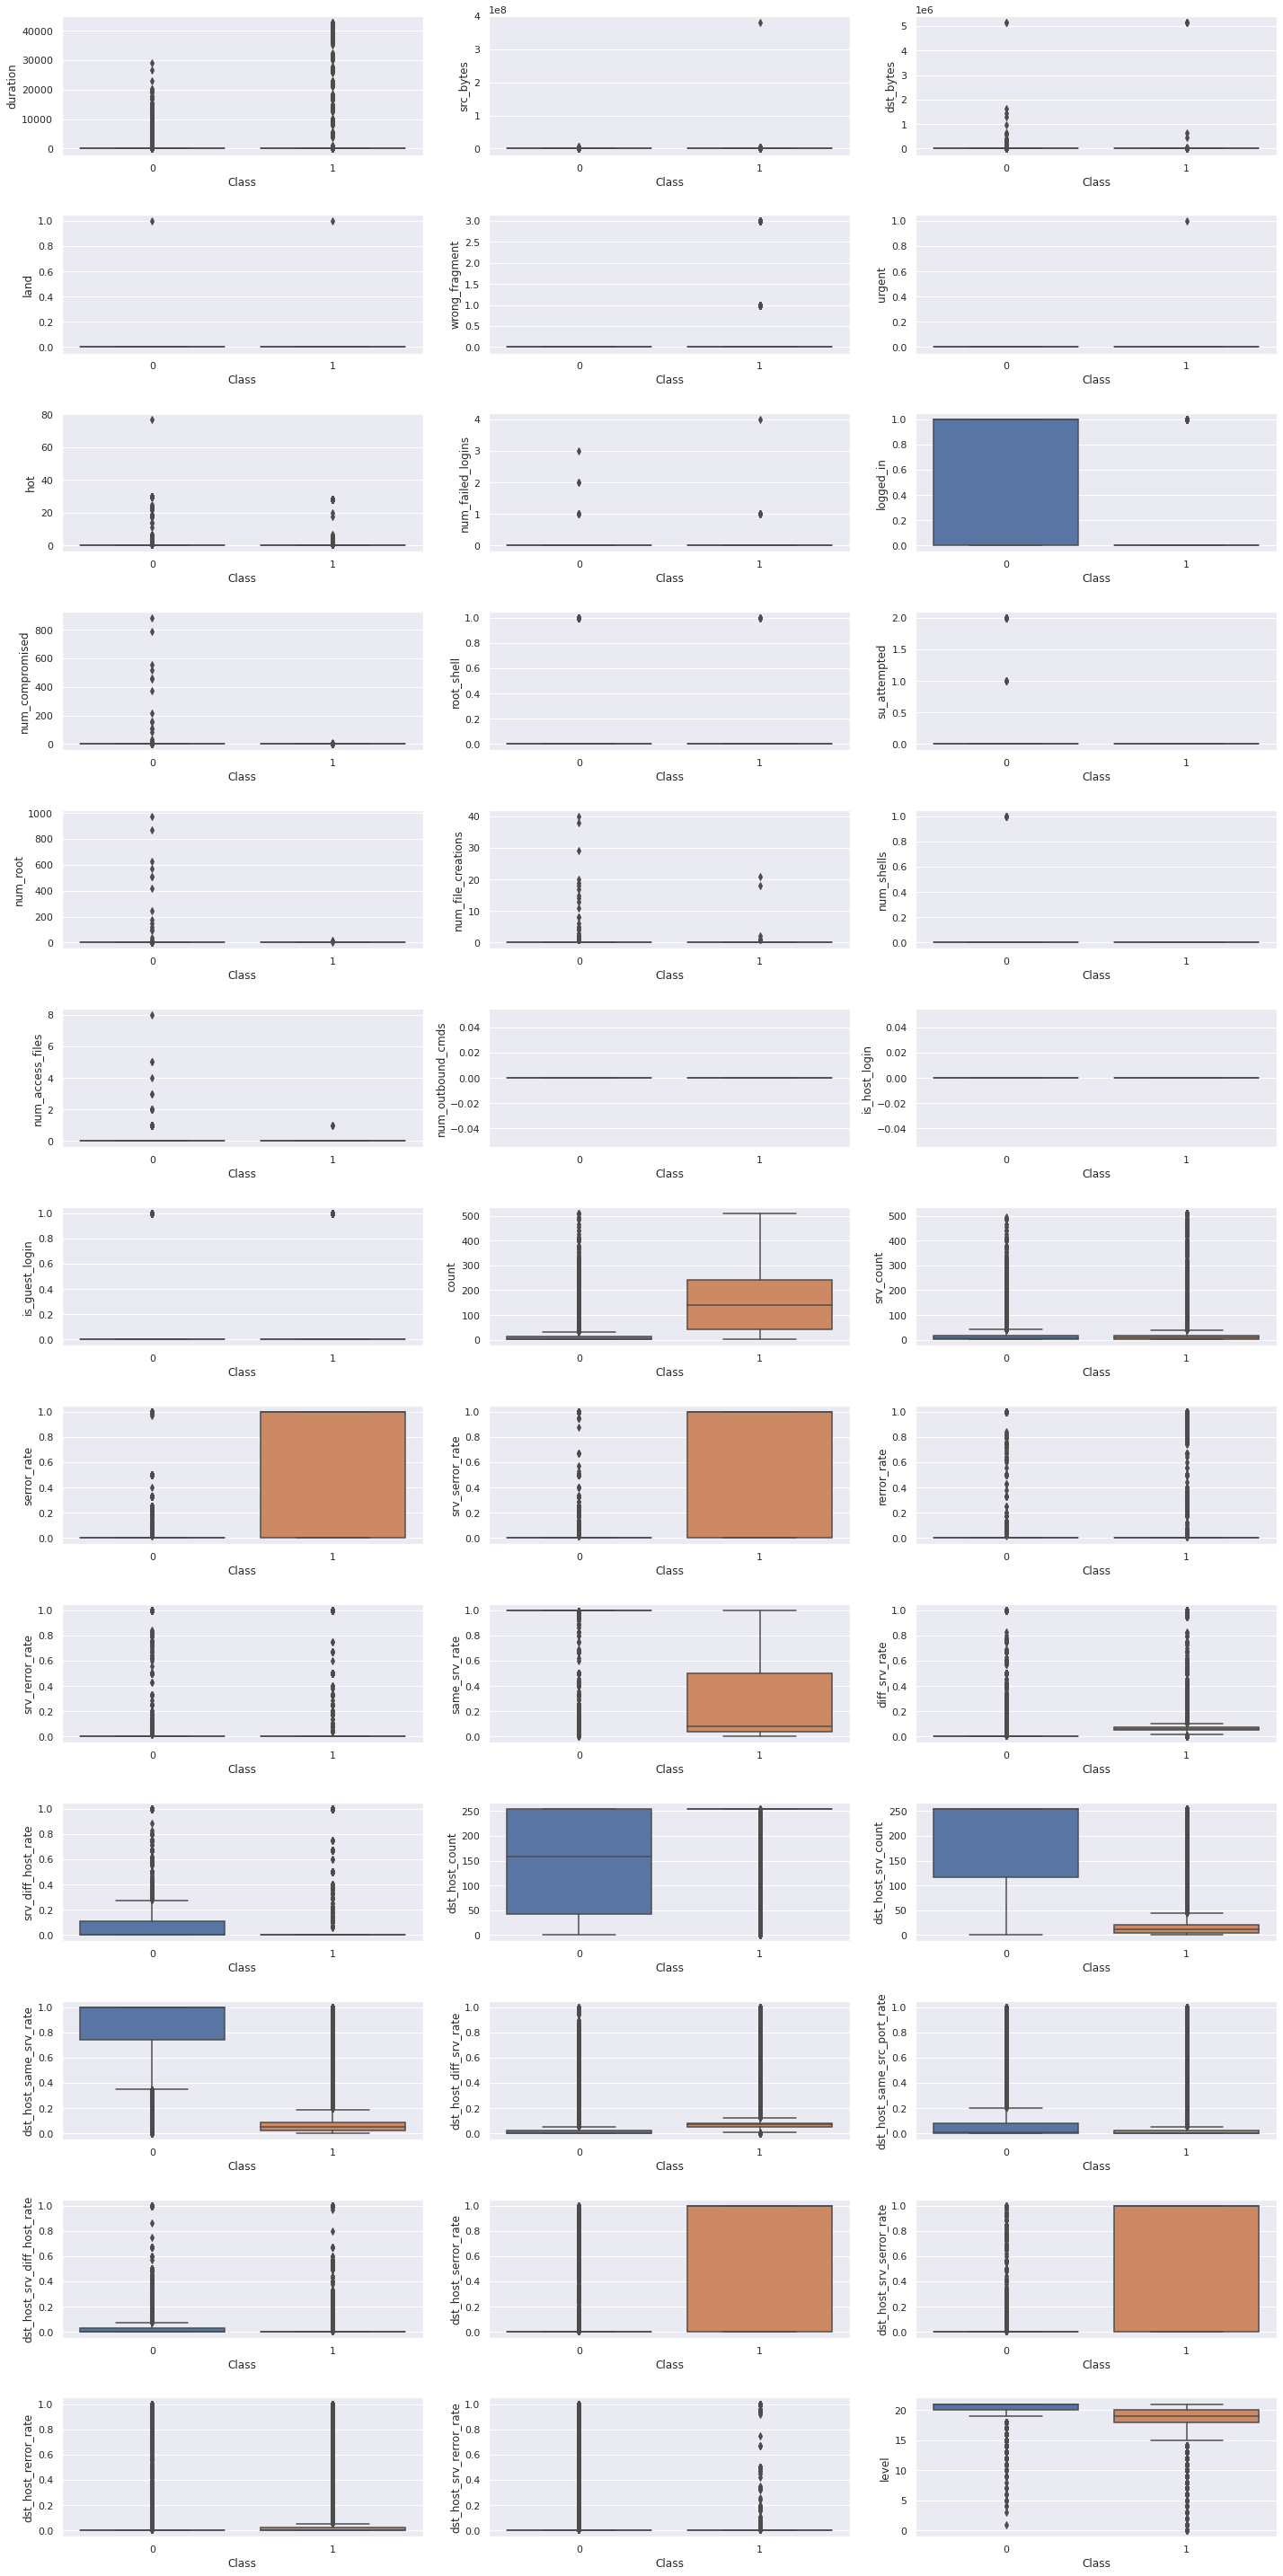

In [ ]:
 
data_parameter = data.drop(['Class','ID'],axis=1).columns
data_numerical = [x for x in data_parameter if (x not in object_column)]

fig, ax=plt.subplots(ncols=3, nrows=13,figsize=(20,40))

ax=ax.flatten()

 
for i, col in enumerate(data_numerical):
  sns.boxplot(data=data, y=col ,x='Class',ax=ax[i])
 

plt.tight_layout()


to remove:
  
> protocol_type , land, root_shell,num_outbound_cmds, is_host_login, is_guest_login,...,
dist_bytes,*srv_diff_host_rate,*urgent,*srv_count, ,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,


important: 
 
> flag, wrong_fragment, num_failed login, logged_in, su_attempted, num_shells, num_accsess_files, src_bytes,service
duration,hot, num_compromised, num_root,
num_file_creaitons,count,diff_srv_rate,  dst_host_count, dst_host_srv_count, dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_serror_rate,num_shells, num_access_files,count(consider to remove outliers),
[(serror_rate,,sev_serror_rate)=>see corr,,(rerror_rate,sev_rerror_rate)=>see corr,, same_srv_rate,,diff_srv_rate,,srv_diff_host_rate,,dst_host_count,,dst_host_srv_count,,dst_host_same_srv_rate,,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,*dst_host_srv_rerror_rate ](consider to remove outliers),level



 

#### search for correlated features:

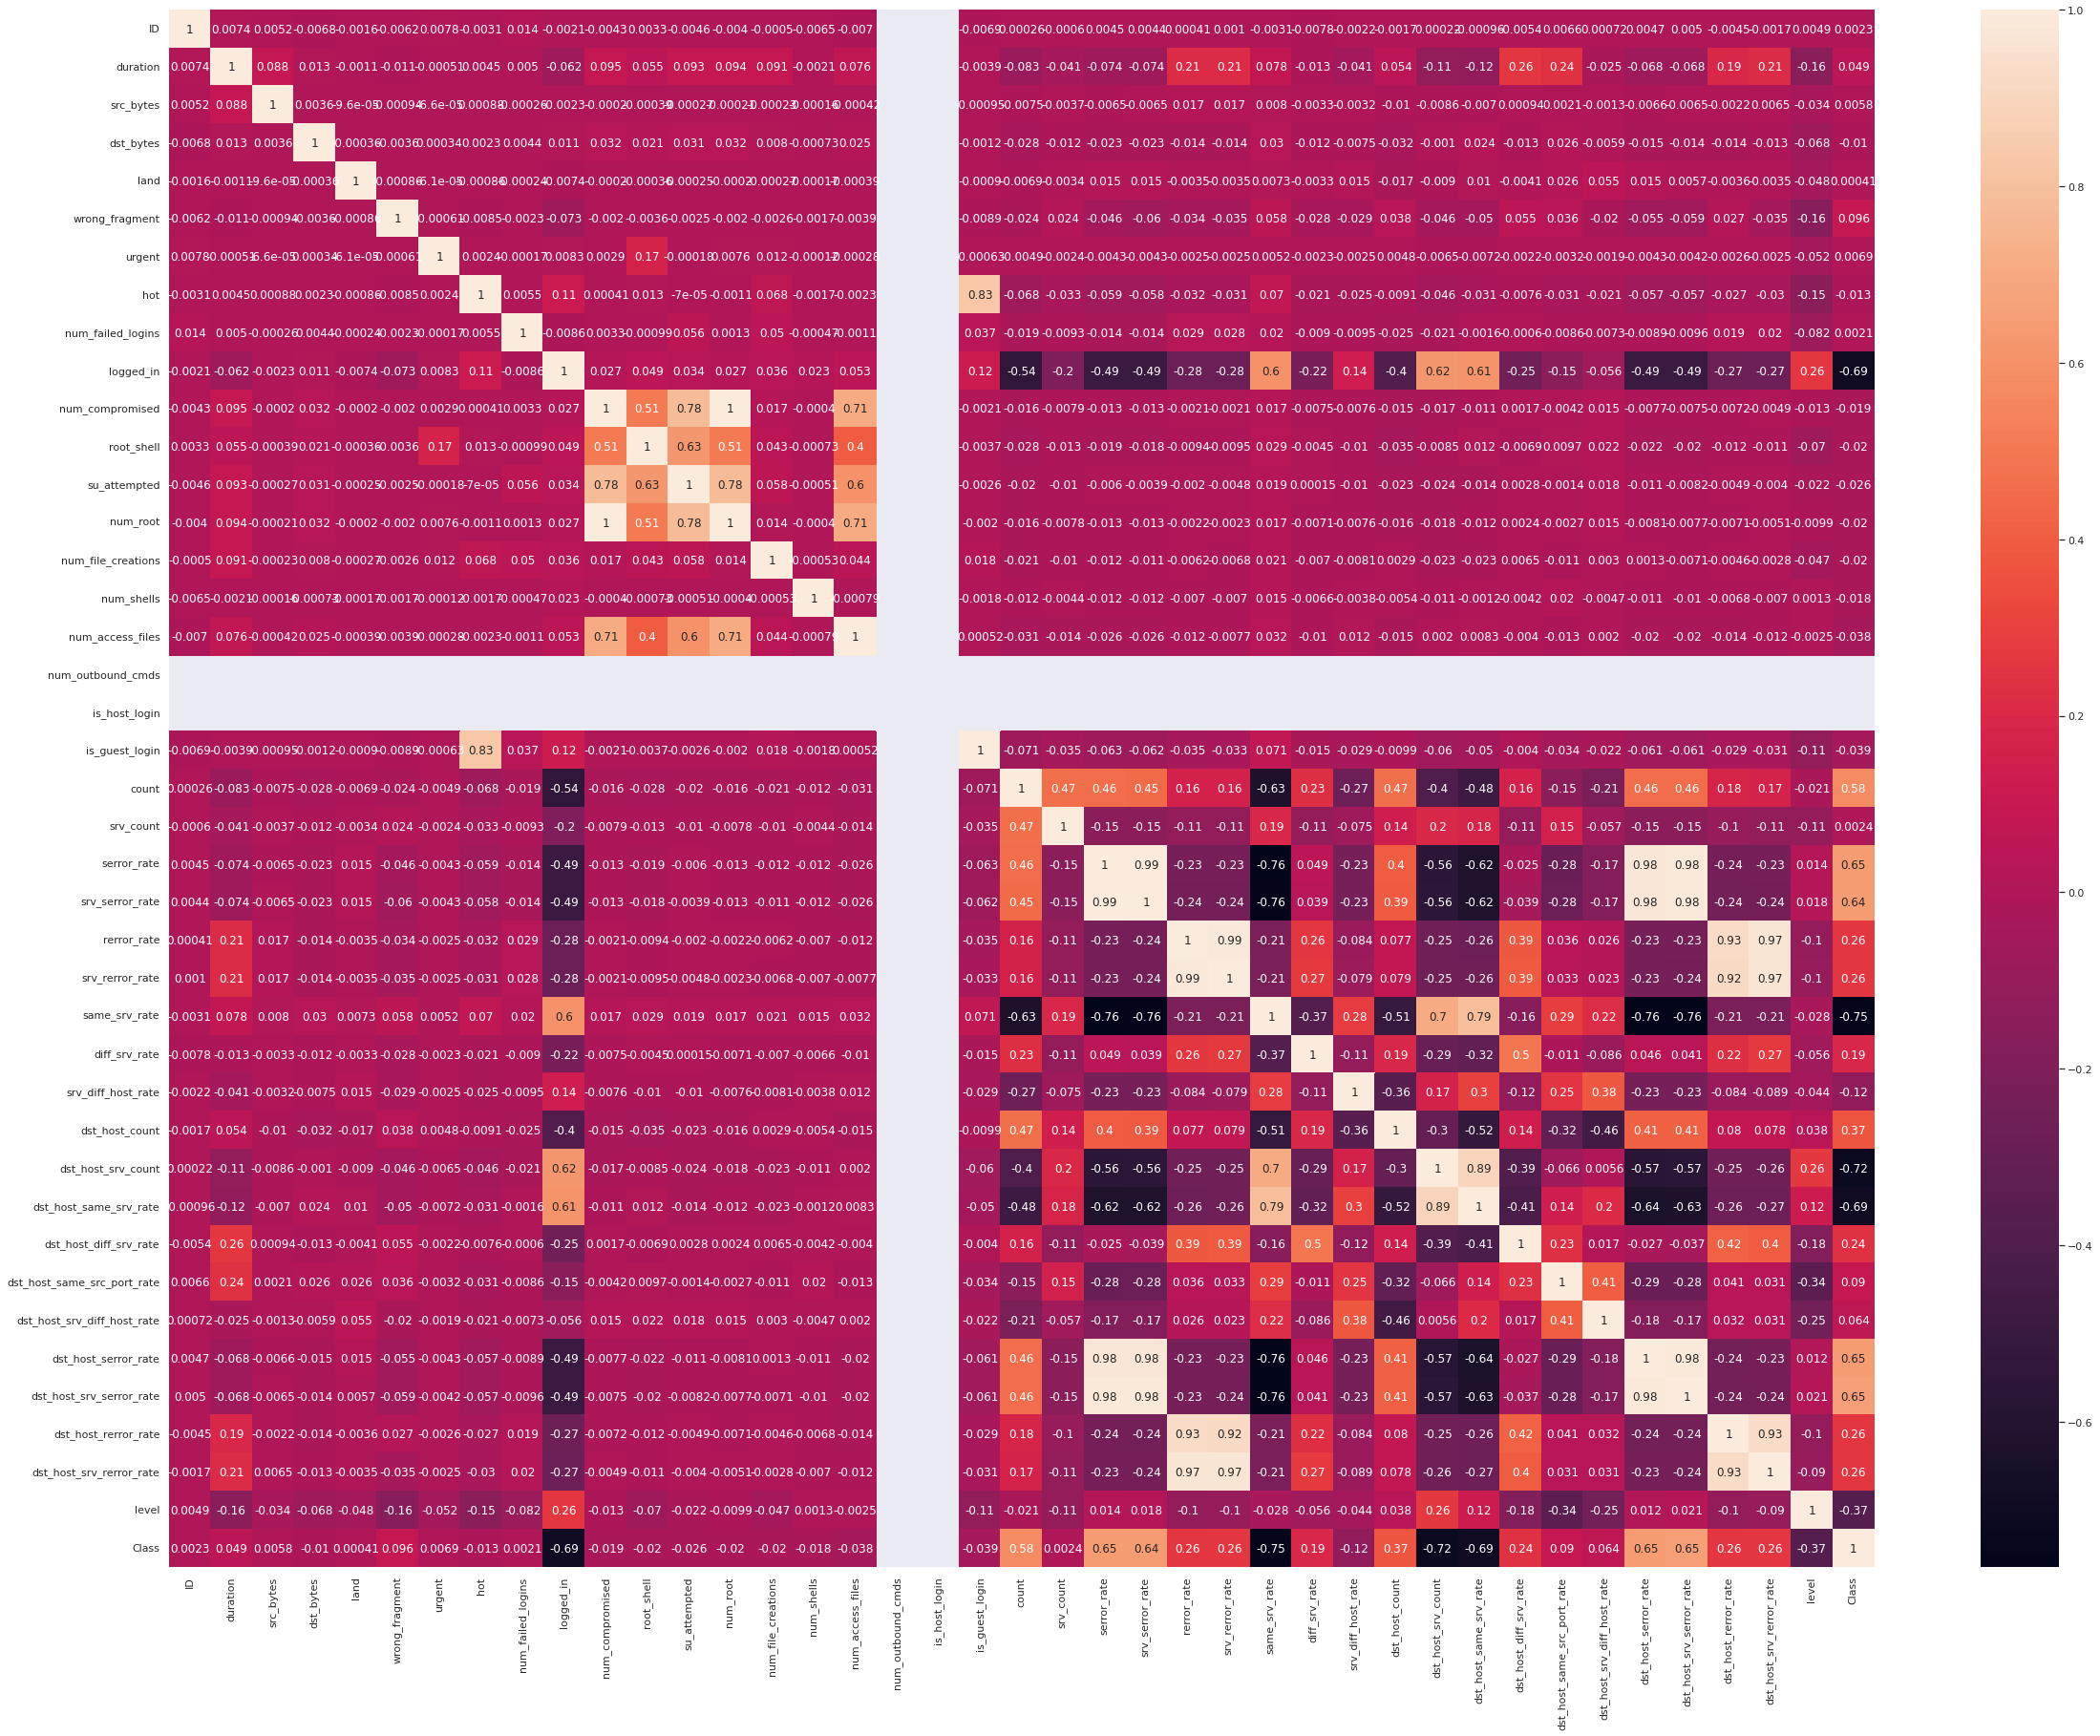

In [ ]:
sns.set(rc={'figure.figsize':(40,30)})
new_data=data.drop(['Class','ID','num_outbound_cmds', 'is_host_login'],axis=1)
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
cor =data.corr()

#correlation with output variable
cor_target=abs(cor["Class"])

#Selecting highly correlated features
relevant_features =cor_target[cor_target>=0.5]
relevant_features 

logged_in                   0.691888
count                       0.576296
serror_rate                 0.646637
srv_serror_rate             0.644097
same_srv_rate               0.746569
dst_host_srv_count          0.720436
dst_host_same_srv_rate      0.693619
dst_host_serror_rate        0.647599
dst_host_srv_serror_rate    0.649963
Class                       1.000000
Name: Class, dtype: float64

In [ ]:
feautres_select= relevant_features.keys()
for col in feautres_select:
  print(col , ':', data[col].nunique())

logged_in : 2
count : 461
serror_rate : 70
srv_serror_rate : 52
same_srv_rate : 97
dst_host_srv_count : 256
dst_host_same_srv_rate : 101
dst_host_serror_rate : 100
dst_host_srv_serror_rate : 87
Class : 2


In [ ]:
features_name =data.drop(['Class','ID','num_outbound_cmds', 'is_host_login'],axis=1).columns

features_name[1]

'protocol_type'

In [ ]:
features_name =data.drop(['Class','ID','num_outbound_cmds', 'is_host_login','flag','protocol_type','service'],axis=1).columns
# ,'flag','protocol_type','service'

corr_features_names= []
corr_features_dic={}
for i in range(len(features_name)-2):
  for j in range(len(features_name)-1):
    j=i+1
    s=features_name[i]+',' +features_name[j]
    if abs(data[[features_name[i],features_name[j]]].corr().iat[0,1]>=0.5) & (s not in corr_features_names):      
      corr_features_dic['('+features_name[i]+','+features_name[j]+') :'] =data[[features_name[i],features_name[j]]].corr().iat[0,1]
      corr_features_names.append(s)

In [ ]:
for f in sorted(corr_features_dic, key=corr_features_dic.get, reverse=True):
    print(f, corr_features_dic[f])

(serror_rate,srv_serror_rate) : 0.9934210562072778
(rerror_rate,srv_rerror_rate) : 0.9892463197310835
(dst_host_serror_rate,dst_host_srv_serror_rate) : 0.9847332626413505
(dst_host_rerror_rate,dst_host_srv_rerror_rate) : 0.9268671691612391
(dst_host_srv_count,dst_host_same_srv_rate) : 0.8947931425074485
(su_attempted,num_root) : 0.7767712338320457
(root_shell,su_attempted) : 0.6265333888801574
(num_compromised,root_shell) : 0.5076652672717874


### Encoding:


#### new_LabelEncoder_for object_data:

In [3]:
def get_greatest_number(catogry_dict,catogry_dict_1,catogry_dict_0,key):
  great=0
  if key in catogry_dict_1:
    great =(catogry_dict_1[key]/catogry_dict[key])
    num =catogry_dict_1[key]
  if (key in catogry_dict_0) and ((key not in catogry_dict_1) or catogry_dict_0[key]>catogry_dict_1[key]):
    great = (catogry_dict_0[key]/catogry_dict[key]) 
    num =catogry_dict_0[key]
  return great, num    

In [4]:
def priorty_label_encoder(old_dataframe,new_dataframe,col_name):
  catogry_dict =old_dataframe[col_name].value_counts()
  catogry_dict_1=old_dataframe[col_name].loc[old_dataframe['Class']==1].value_counts()
  catogry_dict_0=old_dataframe[col_name].loc[old_dataframe['Class']==0].value_counts()
  catogry_dict_1_and_0={}
  pirority_output={}
  greatest_priorty =old_dataframe[col_name].nunique()
  for key, value in catogry_dict.items():
    great,num =get_greatest_number(catogry_dict,catogry_dict_1,catogry_dict_0,key)
    catogry_dict_1_and_0[key] =[great,num]

  output =sorted(catogry_dict_1_and_0.items(), key=lambda item: (item[1]),reverse=True)  

  for i in range(len(output)):
    pirority_output[output[i][0]]=greatest_priorty
    greatest_priorty-=1   

  for i in range(len(new_dataframe[col_name])): 
    new_dataframe[col_name][i]=pirority_output[new_dataframe[col_name][i]]
     

In [5]:
catogrical_to_numerical_labelEncoder_data =data.copy(deep=True)

In [8]:
for col_name in object_column:
  priorty_label_encoder(data,catogrical_to_numerical_labelEncoder_data,col_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for col in object_column:
  print(  data[col].value_counts())

In [ ]:
for col in object_column:
  print(  catogrical_to_numerical_labelEncoder_data[col].value_counts())

### new_label_encoder for all data:

In [ ]:
catogrical_to_numerical_labelEncoder_all_data =data.copy(deep=True)

In [ ]:
catogrical_to_numerical_labelEncoder_all_data

In [ ]:
for col_name in data.drop(['ID','Class'],axis=1).columns:
  priorty_label_encoder(data,catogrical_to_numerical_labelEncoder_all_data,col_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### LabelEncoder_for object_data:

In [ ]:
labelEncoder_data =data.copy(deep=True)

In [ ]:
from sklearn import preprocessing

label_encoder =preprocessing.LabelEncoder()

for col in object_column:
  labelEncoder_data[col]=label_encoder.fit_transform(labelEncoder_data[col])
 

#### OneHotEncoder:

In [ ]:
OneHotEncoder_data =data.drop(['flag','protocol_type','service'],axis=1).copy(deep=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

oneHot_encoder =OneHotEncoder()

encode_columns =pd.DataFrame(oneHot_encoder.fit_transform(data[object_column]).toarray())
 
OneHotEncoder_data =pd.concat([OneHotEncoder_data , encode_columns], axis=1)


# Machine Learning:

### split the new_label_encoder_data:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split the data dataset

x_data_new_lable_encoder =catogrical_to_numerical_labelEncoder_data.drop(['Class','ID','num_outbound_cmds', 'is_host_login'],axis=1).values
y_data_new_lable_encoder=catogrical_to_numerical_labelEncoder_data['Class'].values

x_train_new_lable_encoder, x_test_new_lable_encoder, y_train_new_lable_encoder, y_test_new_lable_encoder =train_test_split(x_data_new_lable_encoder,y_data_new_lable_encoder,test_size=0.3,random_state=1)

### split the new_label_encoder_all_data:


In [ ]:
# split the data dataset

x_data_new_lable_encoder_all =catogrical_to_numerical_labelEncoder_all_data.drop(['Class','ID','num_outbound_cmds', 'is_host_login'],axis=1).values
y_data_new_lable_encoder_all=catogrical_to_numerical_labelEncoder_all_data['Class'].values

x_train_new_lable_encoder_all, x_test_new_lable_encoder_all, y_train_new_lable_encoder_all, y_test_new_lable_encoder_all =train_test_split(x_data_new_lable_encoder_all,y_data_new_lable_encoder_all,test_size=0.3,random_state=1)

### split the label_encoder_data:

In [ ]:
# split the data dataset

x_data_original_lable_encoder =labelEncoder_data.drop(['Class','ID','num_outbound_cmds', 'is_host_login'],axis=1).values
y_data_original_lable_encoder=labelEncoder_data['Class'].values

x_train_original_lable_encoder, x_test_original_lable_encoder, y_train_original_lable_encoder, y_test_original_lable_encoder =train_test_split(x_data_original_lable_encoder,y_data_original_lable_encoder,test_size=0.3,random_state=1)

### split the OneHotEncoder_data:

In [ ]:
# split the data dataset

x_data_OneHotEncoder =OneHotEncoder_data.drop(['Class','ID','num_outbound_cmds', 'is_host_login'],axis=1).values
y_data_OneHotEncoder=OneHotEncoder_data['Class'].values

x_train_OneHotEncoder, x_test_OneHotEncoder, y_train_OneHotEncoder, y_test_OneHotEncoder =train_test_split(x_data_OneHotEncoder,y_data_OneHotEncoder,test_size=0.3,random_state=1)

In [ ]:
import matplotlib.pyplot as plt

## Machine Learning Models:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model =RandomForestClassifier()

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})

### RandomForest

#### Original label encoder using RandomForest:

In [ ]:
rf_model.fit(x_train_original_lable_encoder,  y_train_original_lable_encoder)
y_pred =rf_model.predict(x_test_original_lable_encoder)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3667
           1       1.00      1.00      1.00      3234

    accuracy                           1.00      6901
   macro avg       1.00      1.00      1.00      6901
weighted avg       1.00      1.00      1.00      6901

f1_score = 0.9984529702970297
accuracy= 0.9985509346471526
recall = 0.9978354978354979
precision 0.9990712074303405


<function matplotlib.pyplot.show(*args, **kw)>

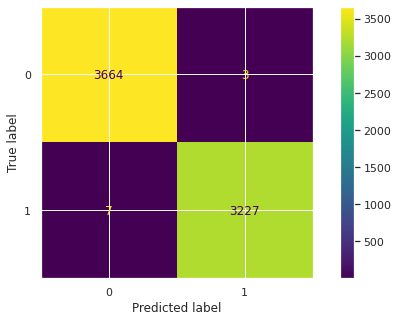

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_original_lable_encoder,y_pred))

f1_score =f1_score(y_test_original_lable_encoder, y_pred)
recall =recall_score(y_test_original_lable_encoder, y_pred)
precision =precision_score(y_test_original_lable_encoder,y_pred)

accuracy =accuracy_score(y_test_original_lable_encoder,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_original_lable_encoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### Original oneHotEncoder using RandomForest:

In [ ]:
rf_model.fit(x_train_OneHotEncoder,  y_train_OneHotEncoder)
y_pred =rf_model.predict(x_test_OneHotEncoder)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3667
           1       1.00      1.00      1.00      3234

    accuracy                           1.00      6901
   macro avg       1.00      1.00      1.00      6901
weighted avg       1.00      1.00      1.00      6901

f1_score = 0.9979885502088813
accuracy= 0.9981162150412983
recall = 0.9972170686456401
precision 0.9990712074303405


<function matplotlib.pyplot.show(*args, **kw)>

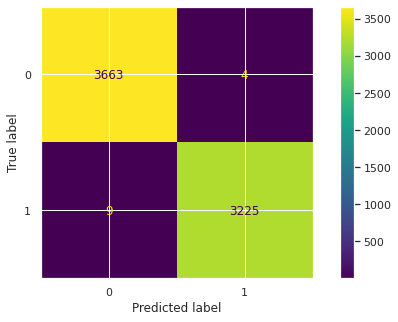

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_OneHotEncoder,y_pred))

f1_score =f1_score(y_test_OneHotEncoder, y_pred)
recall =recall_score(y_test_OneHotEncoder, y_pred)
accuracy =accuracy_score(y_test_OneHotEncoder,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_OneHotEncoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### using new_label_encoder using RandomForest:

In [ ]:
rf_model.fit(x_train_new_lable_encoder,  y_train_new_lable_encoder)
y_pred =rf_model.predict(x_test_new_lable_encoder)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3667
           1       1.00      1.00      1.00      3234

    accuracy                           1.00      6901
   macro avg       1.00      1.00      1.00      6901
weighted avg       1.00      1.00      1.00      6901

f1_score = 0.9982995826248261
accuracy= 0.9984060281118678
recall = 0.9984539270253556
precision 0.998145285935085


<function matplotlib.pyplot.show(*args, **kw)>

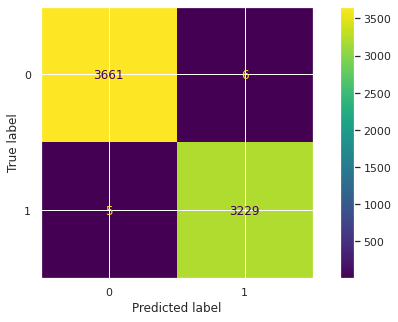

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_new_lable_encoder,y_pred))

f1_score =f1_score(y_test_new_lable_encoder, y_pred)
recall =recall_score(y_test_new_lable_encoder, y_pred)
precision =precision_score(y_test_new_lable_encoder,y_pred)

accuracy =accuracy_score(y_test_new_lable_encoder,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_new_lable_encoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### using new_label_encoder_all using RandomForest:

In [ ]:
rf_model.fit(x_train_new_lable_encoder_all,  y_train_new_lable_encoder_all)
y_pred =rf_model.predict(x_test_new_lable_encoder_all)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3667
           1       1.00      1.00      1.00      3234

    accuracy                           1.00      6901
   macro avg       1.00      1.00      1.00      6901
weighted avg       1.00      1.00      1.00      6901

f1_score = 0.9970583681684472
accuracy= 0.9972467758295899
recall = 0.9956709956709957
precision 0.9984496124031008


<function matplotlib.pyplot.show(*args, **kw)>

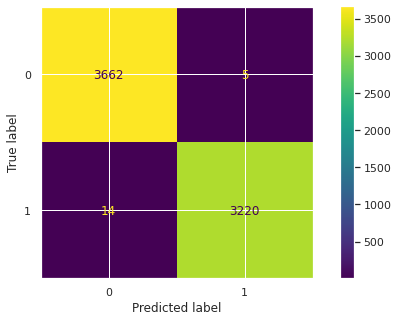

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_new_lable_encoder_all,y_pred))

f1_score =f1_score(y_test_new_lable_encoder_all, y_pred)
recall =recall_score(y_test_new_lable_encoder_all, y_pred)
precision =precision_score(y_test_new_lable_encoder_all,y_pred)

accuracy =accuracy_score(y_test_new_lable_encoder_all,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_new_lable_encoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

### Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model =LogisticRegression()

#### Original label encoder using log_model:

In [ ]:
log_model.fit(x_train_original_lable_encoder,  y_train_original_lable_encoder)
y_pred =log_model.predict(x_test_original_lable_encoder)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3667
           1       0.88      0.86      0.87      3234

    accuracy                           0.88      6901
   macro avg       0.88      0.88      0.88      6901
weighted avg       0.88      0.88      0.88      6901

f1_score = 0.8739443228026275
accuracy= 0.8832053325604985
recall = 0.8639455782312925
precision 0.8841772151898735


<function matplotlib.pyplot.show(*args, **kw)>

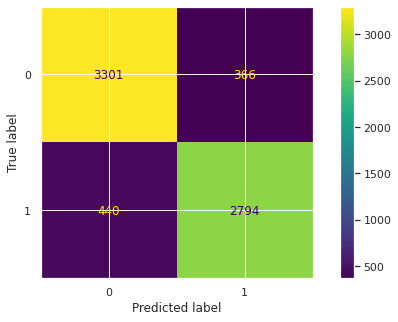

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_original_lable_encoder,y_pred))

f1_score =f1_score(y_test_original_lable_encoder, y_pred)
recall =recall_score(y_test_original_lable_encoder, y_pred)
precision =precision_score(y_test_original_lable_encoder,y_pred)
accuracy =accuracy_score(y_test_original_lable_encoder,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_original_lable_encoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### Original oneHotEncoder using log_model:

In [ ]:
log_model.fit(x_train_OneHotEncoder,  y_train_OneHotEncoder)
y_pred =log_model.predict(x_test_OneHotEncoder)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3667
           1       0.89      0.86      0.87      3234

    accuracy                           0.88      6901
   macro avg       0.88      0.88      0.88      6901
weighted avg       0.88      0.88      0.88      6901

f1_score = 0.8737007874015749
accuracy= 0.8837849587016374
recall = 0.8577612863327149
precision 0.8902439024390244


<function matplotlib.pyplot.show(*args, **kw)>

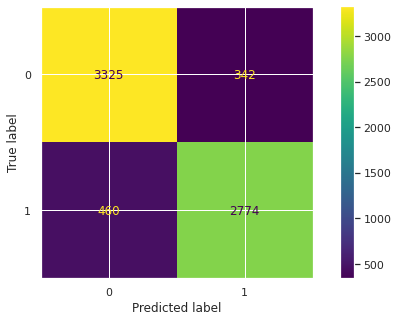

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_OneHotEncoder,y_pred))

f1_score =f1_score(y_test_OneHotEncoder, y_pred)
recall =recall_score(y_test_OneHotEncoder, y_pred)
precision =precision_score(y_test_OneHotEncoder,y_pred)
accuracy =accuracy_score(y_test_OneHotEncoder,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_OneHotEncoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### using new_label_encoder using log_model:

In [ ]:
log_model.fit(x_train_new_lable_encoder,  y_train_new_lable_encoder)
y_pred =log_model.predict(x_test_new_lable_encoder)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3667
           1       0.88      0.86      0.87      3234

    accuracy                           0.88      6901
   macro avg       0.88      0.88      0.88      6901
weighted avg       0.88      0.88      0.88      6901

f1_score = 0.8727101925786754
accuracy= 0.8821909868135053
recall = 0.8617810760667903
precision 0.8839200761179828


<function matplotlib.pyplot.show(*args, **kw)>

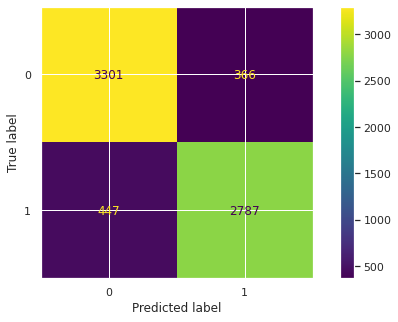

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_new_lable_encoder,y_pred))

f1_score =f1_score(y_test_new_lable_encoder, y_pred)
recall =recall_score(y_test_new_lable_encoder, y_pred)
precision =precision_score(y_test_new_lable_encoder,y_pred)

accuracy =accuracy_score(y_test_new_lable_encoder,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_new_lable_encoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### using new_label_encoder_all using log_model:

In [ ]:
log_model.fit(x_train_new_lable_encoder_all,  y_train_new_lable_encoder_all)
y_pred =log_model.predict(x_test_new_lable_encoder_all)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3667
           1       0.95      0.95      0.95      3234

    accuracy                           0.96      6901
   macro avg       0.96      0.96      0.96      6901
weighted avg       0.96      0.96      0.96      6901

f1_score = 0.9528082933622156
accuracy= 0.9558035067381538
recall = 0.9520717377860235
precision 0.9535459894704242


<function matplotlib.pyplot.show(*args, **kw)>

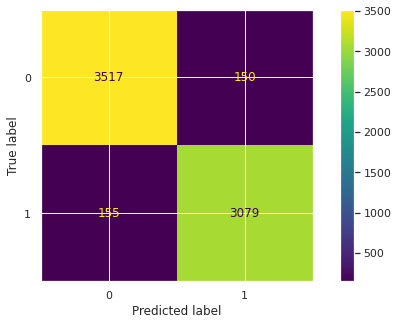

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_new_lable_encoder_all,y_pred))

f1_score =f1_score(y_test_new_lable_encoder_all, y_pred)
recall =recall_score(y_test_new_lable_encoder_all, y_pred)
precision =precision_score(y_test_new_lable_encoder_all,y_pred)

accuracy =accuracy_score(y_test_new_lable_encoder_all,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_new_lable_encoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

### Adaboost:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier =AdaBoostClassifier()

#### Original label encoder using ada_classifier:

In [ ]:
ada_classifier.fit(x_train_original_lable_encoder,  y_train_original_lable_encoder)
y_pred =ada_classifier.predict(x_test_original_lable_encoder)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3667
           1       0.99      0.99      0.99      3234

    accuracy                           0.99      6901
   macro avg       0.99      0.99      0.99      6901
weighted avg       0.99      0.99      0.99      6901

f1_score = 0.9905820595954917
accuracy= 0.9911607013476308
recall = 0.9919604205318491
precision 0.9892075238976257


<function matplotlib.pyplot.show(*args, **kw)>

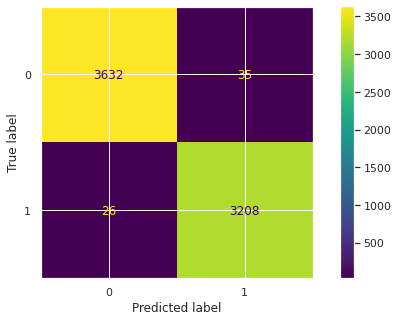

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_original_lable_encoder,y_pred))

f1_score =f1_score(y_test_original_lable_encoder, y_pred)
recall =recall_score(y_test_original_lable_encoder, y_pred)
precision =precision_score(y_test_original_lable_encoder,y_pred)

accuracy =accuracy_score(y_test_original_lable_encoder,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_original_lable_encoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### Original oneHotEncoder using ada_classifier:

In [ ]:
ada_classifier.fit(x_train_OneHotEncoder,  y_train_OneHotEncoder)
y_pred =ada_classifier.predict(x_test_OneHotEncoder)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3667
           1       0.99      0.99      0.99      3234

    accuracy                           0.99      6901
   macro avg       0.99      0.99      0.99      6901
weighted avg       0.99      0.99      0.99      6901

f1_score = 0.9898022249690976
accuracy= 0.9904361686712071
recall = 0.9904143475572047
precision 0.9891908585546634


<function matplotlib.pyplot.show(*args, **kw)>

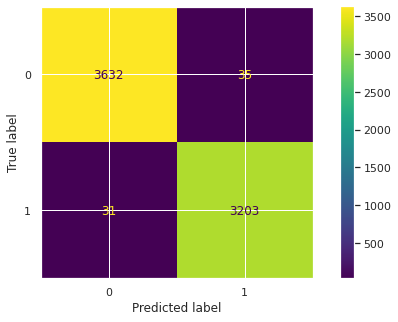

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_OneHotEncoder,y_pred))

f1_score =f1_score(y_test_OneHotEncoder, y_pred)
recall =recall_score(y_test_OneHotEncoder, y_pred)
precision =precision_score(y_test_OneHotEncoder,y_pred)

accuracy =accuracy_score(y_test_OneHotEncoder,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_OneHotEncoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### using new_label_encoder using ada_classifier:

In [ ]:
ada_classifier.fit(x_train_new_lable_encoder,  y_train_new_lable_encoder)
y_pred =ada_classifier.predict(x_test_new_lable_encoder)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3667
           1       0.99      0.99      0.99      3234

    accuracy                           0.99      6901
   macro avg       0.99      0.99      0.99      6901
weighted avg       0.99      0.99      0.99      6901

f1_score = 0.9919653893695921
accuracy= 0.9924648601651934
recall = 0.9925788497217068
precision 0.9913526868437307


<function matplotlib.pyplot.show(*args, **kw)>

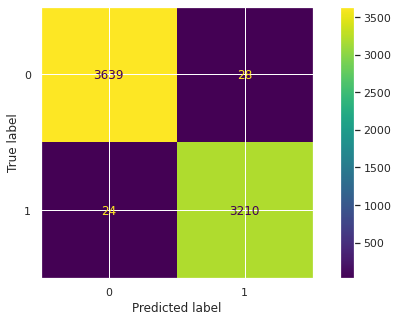

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_new_lable_encoder,y_pred))

f1_score =f1_score(y_test_new_lable_encoder, y_pred)
recall =recall_score(y_test_new_lable_encoder, y_pred)
precision =precision_score(y_test_new_lable_encoder,y_pred)
accuracy =accuracy_score(y_test_new_lable_encoder,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_new_lable_encoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### using new_label_encoder_all using ada_classifier:

In [ ]:
ada_classifier.fit(x_train_new_lable_encoder_all,  y_train_new_lable_encoder_all)
y_pred =ada_classifier.predict(x_test_new_lable_encoder_all)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3667
           1       0.99      0.99      0.99      3234

    accuracy                           0.99      6901
   macro avg       0.99      0.99      0.99      6901
weighted avg       0.99      0.99      0.99      6901

f1_score = 0.9938176197836166
accuracy= 0.9942037385886103
recall = 0.9941249226963512
precision 0.9935105067985167


<function matplotlib.pyplot.show(*args, **kw)>

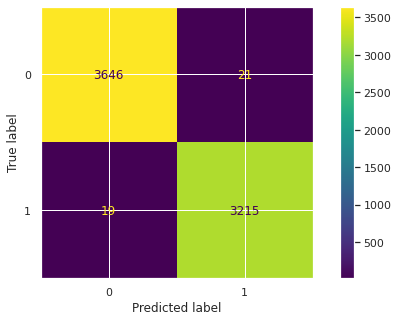

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_new_lable_encoder_all,y_pred))

f1_score =f1_score(y_test_new_lable_encoder_all, y_pred)
recall =recall_score(y_test_new_lable_encoder_all, y_pred)
precision =precision_score(y_test_new_lable_encoder_all,y_pred)

accuracy =accuracy_score(y_test_new_lable_encoder_all,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_new_lable_encoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

### xgboost:

In [ ]:
from xgboost import XGBClassifier

xgb_classifier =XGBClassifier()

#### Original label encoder using xgb_classifier:

In [ ]:
xgb_classifier.fit(x_train_original_lable_encoder,  y_train_original_lable_encoder)
y_pred =xgb_classifier.predict(x_test_original_lable_encoder)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3667
           1       1.00      1.00      1.00      3234

    accuracy                           1.00      6901
   macro avg       1.00      1.00      1.00      6901
weighted avg       1.00      1.00      1.00      6901

f1_score = 0.9975278121137207
accuracy= 0.9976814954354442
recall = 0.9981447124304267
precision 0.9969116738727609


<function matplotlib.pyplot.show(*args, **kw)>

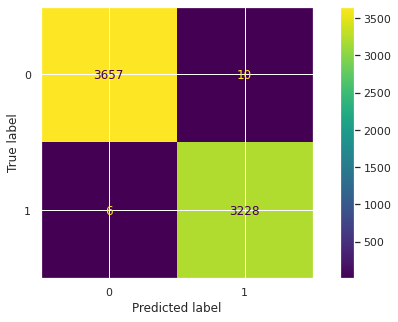

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_original_lable_encoder,y_pred))

f1_score =f1_score(y_test_original_lable_encoder, y_pred)
recall =recall_score(y_test_original_lable_encoder, y_pred)
precision =precision_score(y_test_original_lable_encoder,y_pred)

accuracy =accuracy_score(y_test_original_lable_encoder,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_original_lable_encoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### Original oneHotEncoder using xgb_classifier:

In [ ]:
xgb_classifier.fit(x_train_OneHotEncoder,  y_train_OneHotEncoder)
y_pred =xgb_classifier.predict(x_test_OneHotEncoder)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3667
           1       1.00      1.00      1.00      3234

    accuracy                           1.00      6901
   macro avg       1.00      1.00      1.00      6901
weighted avg       1.00      1.00      1.00      6901

f1_score = 0.9976819656930922
accuracy= 0.9978264019707289
recall = 0.9981447124304267
precision 0.9972196478220574


<function matplotlib.pyplot.show(*args, **kw)>

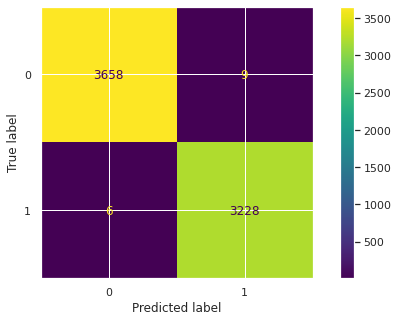

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_OneHotEncoder,y_pred))

f1_score =f1_score(y_test_OneHotEncoder, y_pred)
recall =recall_score(y_test_OneHotEncoder, y_pred)
precision =precision_score(y_test_OneHotEncoder,y_pred)

accuracy =accuracy_score(y_test_OneHotEncoder,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_OneHotEncoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### using new_label_encoder using xgb_classifier:

In [ ]:
xgb_classifier.fit(x_train_new_lable_encoder,  y_train_new_lable_encoder)
y_pred =xgb_classifier.predict(x_test_new_lable_encoder)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3667
           1       1.00      1.00      1.00      3234

    accuracy                           1.00      6901
   macro avg       1.00      1.00      1.00      6901
weighted avg       1.00      1.00      1.00      6901

f1_score = 0.9970638232112501
accuracy= 0.9972467758295899
recall = 0.9975262832405689
precision 0.9966017917825146


<function matplotlib.pyplot.show(*args, **kw)>

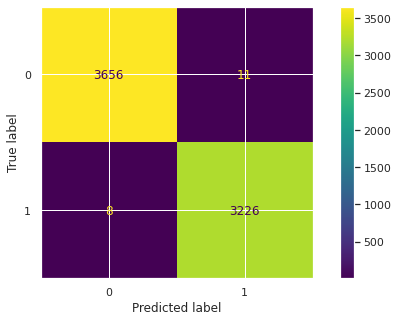

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_new_lable_encoder,y_pred))

f1_score =f1_score(y_test_new_lable_encoder, y_pred)
recall =recall_score(y_test_new_lable_encoder, y_pred)
precision =precision_score(y_test_new_lable_encoder,y_pred)

accuracy =accuracy_score(y_test_new_lable_encoder,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_new_lable_encoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### using new_label_encoder_all using xgb_classifier:

In [ ]:
xgb_classifier.fit(x_train_new_lable_encoder_all,  y_train_new_lable_encoder_all)
y_pred =xgb_classifier.predict(x_test_new_lable_encoder_all)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3667
           1       1.00      0.99      1.00      3234

    accuracy                           1.00      6901
   macro avg       1.00      1.00      1.00      6901
weighted avg       1.00      1.00      1.00      6901

f1_score = 0.9953560371517027
accuracy= 0.9956528039414577
recall = 0.9941249226963512
precision 0.9965902045877247


<function matplotlib.pyplot.show(*args, **kw)>

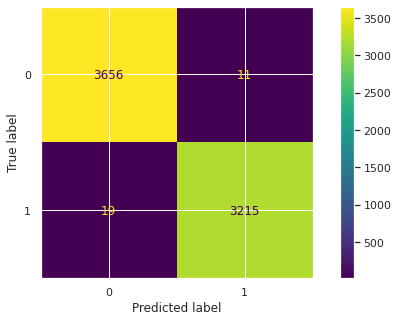

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_new_lable_encoder_all,y_pred))

f1_score =f1_score(y_test_new_lable_encoder_all, y_pred)
recall =recall_score(y_test_new_lable_encoder_all, y_pred)
precision =precision_score(y_test_new_lable_encoder_all,y_pred)

accuracy =accuracy_score(y_test_new_lable_encoder_all,y_pred)

print('f1_score =', f1_score)
print('accuracy=', accuracy)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_new_lable_encoder,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

### Results:

Logistic Regression

 Original label encoder
f1_score = 0.8739443228026275
accuracy= 0.8832053325604985
recall = 0.8639455782312925
precision 0.8841772151898735

Original oneHotEncoder
f1_score = 0.874125874125874
accuracy= 0.8852340240544848
recall = 0.8503401360544217
precision 0.8992805755395683

new_label_encoder
f1_score = 0.8727101925786754
accuracy= 0.8821909868135053
recall = 0.8617810760667903
precision 0.8839200761179828

new_label_encoder_all
f1_score = 0.9528082933622156
accuracy= 0.9558035067381538
recall = 0.9520717377860235
precision 0.9535459894704242

Adaboost

 Original label encoder
f1_score = 0.9905820595954917
accuracy= 0.9911607013476308
recall = 0.9919604205318491
precision 0.9892075238976257

Original oneHotEncoder
f1_score = 0.9898022249690976
accuracy= 0.9904361686712071
recall = 0.9904143475572047
precision 0.9891908585546634

new_label_encoder
f1_score = 0.9919653893695921
accuracy= 0.9924648601651934
recall = 0.9925788497217068
precision 0.9913526868437307

new_label_encoder_all
f1_score = 0.9938176197836166
accuracy= 0.9942037385886103
recall = 0.9941249226963512
precision 0.9935105067985167

Xgboost

 Original label encoder
f1_score = 0.9975278121137207
accuracy= 0.9976814954354442
recall = 0.9981447124304267
precision 0.9969116738727609

Original oneHotEncoder
f1_score = 0.9976819656930922
accuracy= 0.9978264019707289
recall = 0.9981447124304267
precision 0.9972196478220574

new_label_encoder
f1_score = 0.9970638232112501
accuracy= 0.9972467758295899
recall = 0.9975262832405689
precision 0.9966017917825146

new_label_encoder_all
f1_score = 0.9953560371517027
accuracy= 0.9956528039414577
recall = 0.9941249226963512
precision 0.9965902045877247

RandomForest

Original label encoder
f1_score = 0.9981441385709867
accuracy= 0.9982611215765831
recall = 0.9978354978354979
precision 0.9984529702970297

Original oneHotEncoder
f1_score = 0.9978321461752865
accuracy= 0.9979713085060136
recall = 0.9962894248608535
precision 0.9984529702970297

new_label_encoder
f1_score = 0.9982995826248261
accuracy= 0.9984060281118678
recall = 0.9984539270253556
precision 0.998145285935085

new_label_encoder_all
f1_score = 0.996595481275147
accuracy= 0.9968120562237357
recall = 0.9956709956709957
precision 0.9975216852540273